## Regression

In [7]:
from sklearn.datasets import make_regression
from kiwigrad import MLP, Layer, Value
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import time
%matplotlib inline

### Dataset

In [8]:
X, y = make_regression(n_samples=200, n_features=5, n_targets=1, random_state=42)
print(X.shape)
print(y.shape)
print(X[0])
print(y[0:5])

(200, 5)
(200,)
[0.95927083 0.02451017 0.49799829 1.45114361 2.15318246]
[172.54436082 -52.9529574   -4.14935233 193.99958991 -66.96262773]


In [9]:
inputs = [[Value(i) for i in elem] for elem in X]
inputs[0]

[Value(data=0.959271, grad=0.000000),
 Value(data=0.024510, grad=0.000000),
 Value(data=0.497998, grad=0.000000),
 Value(data=1.451144, grad=0.000000),
 Value(data=2.153182, grad=0.000000)]

### Multi layer perceptron

In [10]:
class PotNet(MLP):
    def __init__(self):
        layers = [
            Layer(nin=5, nout=16, bias=True, activation="relu"),
            Layer(nin=16, nout=16, bias=True, activation="relu"),
            Layer(nin=16, nout=1, bias=True, activation="linear")
        ]
        super().__init__(layers=layers)

model = PotNet()
y_pred = model(inputs[0])
print(y_pred)

Value(data=2.915469, grad=0.000000)


### Full batch gradient descent with squared error loss

Squared error (squared L2 norm):

$$ l(x,y) = L = (\hat{y}_i - y_i)^2$$



In [11]:
epochs = 100
for epoch in range(epochs):
    y_pred = []
    s = time.monotonic()
    for i in range(len(inputs)):
        output = model(inputs[i])
        y_pred.append(output.data)
        target = Value(y[i])
        loss = (output - target) ** 2
        #loss = (output - target) * (output - target)
        loss.backward()
        for p in model.parameters():
            p.data += -0.00001 * p.grad
        model.zero_grad()
    e = time.monotonic()
    t = e - s
    r2 = r2_score(y, y_pred)
    if epoch % 10 == 0:
        print(f"epoch: {epoch} | loss: {loss.data:.2f} | R2: {r2:.2f} | time: {t:.2f} sec.")

epoch: 0 | loss: 790.08 | R2: 0.02 | time: 0.09 sec.
epoch: 10 | loss: 203.87 | R2: 0.99 | time: 0.07 sec.
epoch: 20 | loss: 116.57 | R2: 0.99 | time: 0.07 sec.
epoch: 30 | loss: 57.33 | R2: 1.00 | time: 0.07 sec.
epoch: 40 | loss: 22.01 | R2: 1.00 | time: 0.07 sec.
epoch: 50 | loss: 8.10 | R2: 1.00 | time: 0.07 sec.
epoch: 60 | loss: 3.19 | R2: 1.00 | time: 0.07 sec.
epoch: 70 | loss: 1.41 | R2: 1.00 | time: 0.08 sec.
epoch: 80 | loss: 0.76 | R2: 1.00 | time: 0.08 sec.
epoch: 90 | loss: 0.49 | R2: 1.00 | time: 0.16 sec.


### Result

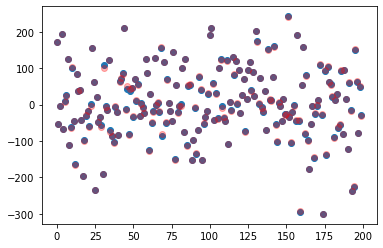

In [12]:
x = [i for i in range(len(inputs))]
plt.scatter(x, y)
plt.scatter(x, y_pred, color='red', alpha=0.3)
plt.show()